# <center>Advanced Machine Learning. Homework #1</center>
Task text:
<br>
(ru) https://docs.google.com/document/d/1snU4dXicuPmFz9XjTF8c7nSw0qGdJAgdJeZVrg-NakI
<br>
(en) https://github.com/balan/MADE/blob/main/advancedml/advancedml_hw1_text.pdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.linear_model import LinearRegression
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

## Part I: Probability and Bayes

Let us introduce notation for this task:

$G$ = {person is guilty}, $\ R$ = {blood is rare}, $\ \alpha = 0.01 -$ fraction of people with rare blood, $\ N = 1000000 -$ number of citizens.

<br>
1.
Prosecutor's mistake: evaluation of probability of rare blood when person is not guilty $\ P(R | \overline{G}) = \alpha$, and further conclusion of probability of guilt equal to $1 - \alpha$ is incorrect. The goal is to evaluate probability of guilt under condition of rare blood. This result must be written as: $\ P(G | R).$

Ошибка прокурора: он оценил вероятность того, что подсудимый имеет редкую группу крови при условии его невиновности $\ P(R | \overline{G}) = \alpha$, однако эта оценка не позволяет сделать главный вывод - как оценить вероятность виновности подсудимого, имеющего редкую группу крови. Желаемый результат должен иметь следующий вид: $\ P(G | R).$

<br>
2.
The lawyer formulated probability of choosing random person with rare blood among all citizens as: $p = \dfrac{1}{\#\{citizens \ with \ rare \ blood\}} = \dfrac{1}{N \alpha}$.

This probability does not take into account any information on possible dependency of people's innocence/guilt and their blood group, the lawyer proposes that probability of person being guilt $P(G)$ is uniform. His result might be taken as prior, however, the task was to evaluate $\ P(G | R).$

<br>
3. Notation:

$d = \mathbb{1}[$person has disease$], \quad t = \mathbb{1}[$test diagnoses disease$].$

$e_1 = P(t = 1 | d = 0)$ - type I error, $\quad e_2 = P(t = 0 | d = 1)$ - type II error.

$\delta = P(d = 1)$ - fraction of people with disease (prior probability of disease).

The goal is to clarify inference of reducing errors (both of $e_1, e_2$ are changed independently) on posterior probabilities of disease. We remember that number of false positives and false negatives respond to type I error and type II error respectively. 

$P(d = 1 | t = 1) = \dfrac{P(d = 1, t = 1)}{P(t = 1)} = \dfrac{P(t = 1 | d = 1) P(d = 1)}{P(t = 1 | d = 0) P(d = 0) + P(t = 1 | d = 1) P(d = 1)}.$

$P(d = 1 | t = 0) = \dfrac{P(d = 1, t = 0)}{P(t = 0)} = \dfrac{P(t = 0 | d = 1) P(d = 1)}{P(t = 0 | d = 0) P(d = 0) + P(t = 0 | d = 1) P(d = 1)}.$

Now let us rewrite using notation:

$$P(d = 1 | t = 1) = \dfrac{(1 - e_2) \delta}{e_1 (1 - \delta) + (1 - e_2) \delta}.$$

$$P(d = 1 | t = 0) = \dfrac{e_2 \delta}{(1 - e_1) (1 - \delta) + e_2 \delta}.$$

In [2]:
delta = 0.01
error = 0.05

def posterior_positive_test(e1, e2, delta=delta):
    return (1 - e2) * delta / (e1 * (1 - delta) + (1 - e2) * delta)

def posterior_negative_test(e1, e2, delta=delta):
    return e2 * delta / ((1 - e1) * (1 - delta) + e2 * delta)

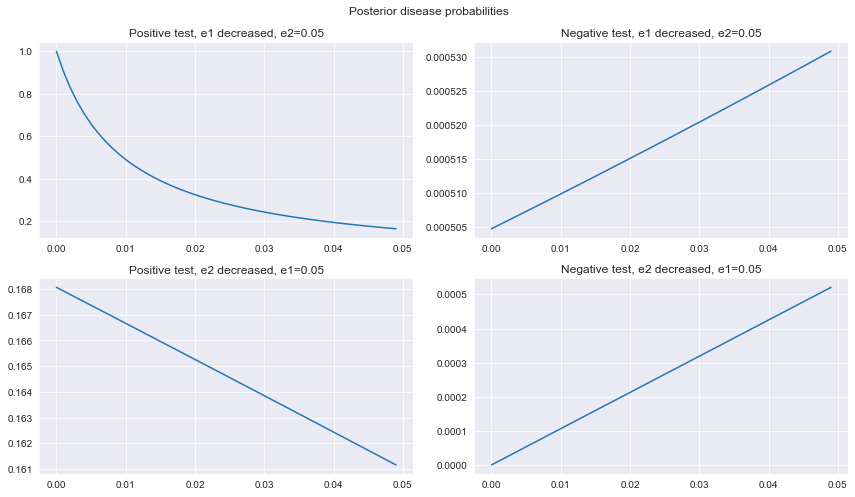

In [3]:
x = np.arange(0, 0.05, 0.001)

fig, ax = plt.subplots(2, 2, figsize=(12,7))
fig.suptitle("Posterior disease probabilities")
ax[0, 0].plot(x, posterior_positive_test(e1=x, e2=error))
ax[0, 0].set_title("Positive test, e1 decreased, e2=0.05")
ax[1, 0].plot(x, posterior_positive_test(e1=error, e2=x))
ax[1, 0].set_title("Positive test, e2 decreased, e1=0.05")
ax[0, 1].plot(x, posterior_negative_test(e1=x, e2=error))
ax[0, 1].set_title("Negative test, e1 decreased, e2=0.05")
ax[1, 1].plot(x, posterior_negative_test(e1=error, e2=x))
ax[1, 1].set_title("Negative test, e2 decreased, e1=0.05")
fig.tight_layout();

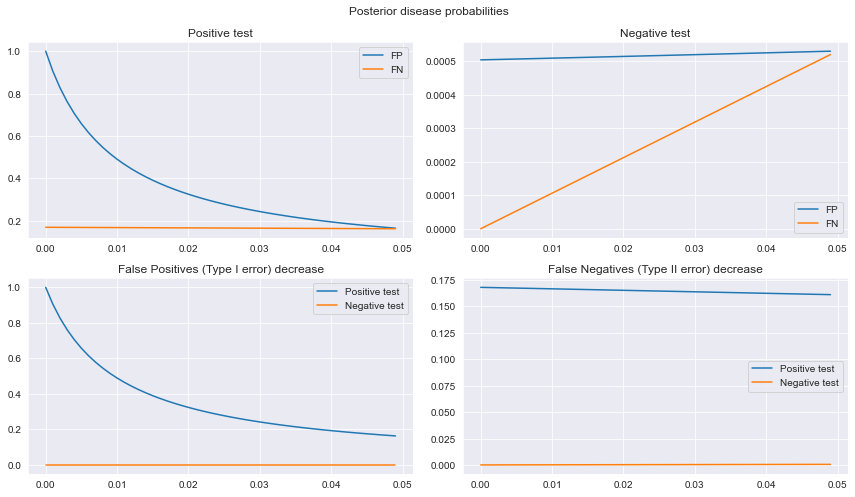

In [4]:
x = np.arange(0, 0.05, 0.001)

fig, ax = plt.subplots(2, 2, figsize=(12,7))
fig.suptitle("Posterior disease probabilities")
l1, = ax[0, 0].plot(x, posterior_positive_test(e1=x, e2=error))
l2, = ax[0, 0].plot(x, posterior_positive_test(e1=error, e2=x))
ax[0, 0].set_title("Positive test")
ax[0, 0].legend([l1, l2], ['FP', 'FN'])
l1, = ax[1, 0].plot(x, posterior_positive_test(e1=x, e2=error))
l2, = ax[1, 0].plot(x, posterior_negative_test(e1=x, e2=error))
ax[1, 0].set_title("False Positives (Type I error) decrease")
ax[1, 0].legend([l1, l2], ['Positive test', 'Negative test'])
l1, = ax[0, 1].plot(x, posterior_negative_test(e1=x, e2=error))
l2, = ax[0, 1].plot(x, posterior_negative_test(e1=error, e2=x))
ax[0, 1].set_title("Negative test")
ax[0, 1].legend([l1, l2], ['FP', 'FN'])
l1, = ax[1, 1].plot(x, posterior_positive_test(e1=error, e2=x))
l2, = ax[1, 1].plot(x, posterior_negative_test(e1=error, e2=x))
ax[1, 1].set_title("False Negatives (Type II error) decrease")
ax[1, 1].legend([l1, l2], ['Positive test', 'Negative test'])
fig.tight_layout();

**Conclusion:**

In my opinion, the most influencial effect is observed in the case when a person has *positive* test and the doctors decreased number of *False Negatives,* the posterior probability of disease increased from 0.2 to 1.0. 

In the case of negative test, the posterior disease probabilities are already small (0.0005), however they should be small by nature. If the doctors are interested to reduce posterior probability of disease on negative test to zero, they should reduce number of *False Positives*.

Finally, we have a compromise:
- if we want posterior probability of disease on positive test $P(d = 1 | t = 1) \rightarrow 1$, then we need FN (Type II error) $ \rightarrow 0$
- if we want posterior probability of disease on negative test $P(d = 1 | t = 0) \rightarrow 0$, then we need FP (Type I error) $ \rightarrow 0$

## Part II: Linear Regression

Load data: coronavirus cases in Russia since 3rd of March

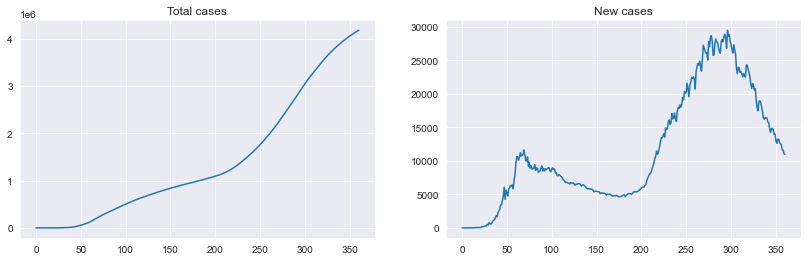

In [5]:
data_full = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
data_full = data_full[['date', 'location', 'total_cases', 'new_cases']].dropna()
data_full['date'] = pd.to_datetime(data_full['date'])

START_DATE = '2020-03-03'
data = data_full.loc[data_full['location'] == 'Russia']
data = data.loc[data['date'] >= START_DATE].reset_index()

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(data['total_cases'].values)
ax[0].set_title("Total cases")
ax[1].plot(data['new_cases'].values)
ax[1].set_title("New cases");

### Exponential model
<br>
Fit linear models: $\ \log y = w_0 + w_1 x, \$ where

- $x$ - day number
- $y$ - total cases or new cases

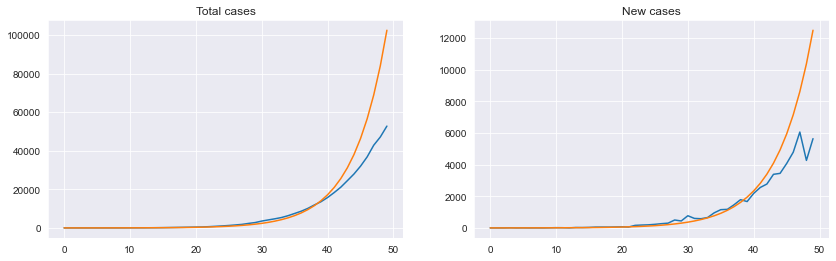

In [6]:
TRAIN_SIZE = 50

total_train = data['total_cases'][:TRAIN_SIZE].values
new_train = data['new_cases'].replace(0, 1)[:TRAIN_SIZE].values
x_train = np.arange(TRAIN_SIZE).reshape(-1, 1)

DATES = ['2020-05-01', '2020-06-01', '2020-09-01']
OFFSETS = [pd.date_range(START_DATE, date, freq='1d').shape[0] - 1 for date in DATES]
total_cases = data.loc[data['date'] <= DATES[-1]]['total_cases'].values
new_cases = data.loc[data['date'] <= DATES[-1]]['new_cases'].replace(0, 1).values

model_total = LinearRegression()
model_new = LinearRegression()
model_total.fit(x_train, np.log(total_train))
model_new.fit(x_train, np.log(new_train));

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(total_train)
ax[0].plot(np.exp(model_total.predict(x_train)))
ax[0].set_title("Total cases")
ax[1].plot(new_train)
ax[1].plot(np.exp(model_new.predict(x_train)))
ax[1].set_title("New cases");

In [7]:
sigma_noise_total = np.std(np.log(total_train) - model_total.predict(x_train))
sigma_noise_new = np.std(np.log(new_train) - model_new.predict(x_train))
print(f'Standard deviations\n Total cases: {sigma_noise_total}\n New cases: {sigma_noise_new}')

Standard deviations
 Total cases: 0.3490422059635658
 New cases: 0.5960780559466519


Under condition of normal prior distribution and normality of data (due to usage of linear regression), we can guarantee normality of posterior distribution of regression parameters.

Hence, bayesian update is made using whole sample $X$ following these equations:
$$\Sigma^{-1} = \Sigma_0^{-1} + \frac{1}{\sigma^2} X^{*}X$$
$$\mu = \Sigma (\Sigma_0^{-1} \mu_0 + \frac{1}{\sigma^2} X^{*}y)$$
where $\ (X, y)$ - data, $\ (\mu_0, \Sigma_0)$ - posterior parameters.

Everywhere below $\mu_0$ is chosen randomly and $\Sigma_0$ is rather large. 

In [8]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.hstack([np.ones_like(x[:, :1]), x])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), mu.reshape(-1, 1)) + (1 / (sigma_noise ** 2)) * \
                     np.matmul(np.transpose(x_matrix), y.reshape(-1, 1)))
    return mu_n, sigma_n

In [9]:
# take some prior mu and sigma
mu_0_total = np.random.randn(2)
mu_0_new = np.random.randn(2)
sigma_0 = 100. * np.identity(2)

mu_total, sigma_total = bayesian_update(mu_0_total, sigma_0, x_train, np.log(total_train), sigma_noise_total)
mu_new, sigma_new = bayesian_update(mu_0_new, sigma_0, x_train, np.log(new_train), sigma_noise_new)

In [10]:
def exponential_sampling(mu, sigma, x, y, start, n, title, points=None):
    # sample + draw data
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(title)
    res = []
    res_log = []
    for w in my_w:
        if points:
            res.append(np.exp(w[0] + w[1] * x))
        if not points and max(np.exp(w[0] + w[1] * x)) < 10 * max(y):
            ax[0].plot(x, np.exp(w[0] + w[1] * x), 'k-', lw=.4)
            res.append(np.exp(w[0] + w[1] * x))
        ax[1].plot(x, w[0] + w[1] * x, 'k-', lw=.4)
        res_log.append(w[0] + w[1] * x)
    if not points is None:
        for r in res:
            ax[0].plot(x, r, 'k-', lw=.4)
        ax[0].set_ylim((0, 10 * max(y)))
        text = '---Results for chosen dates---\n'
        dates = [(pd.to_datetime(start) + pd.DateOffset(days=p)).date() for p in points[0]]
        for true, pred, date in zip(points[1], np.mean(res, axis=0)[points[0]], dates):
            text += f'{date}: Groudtruth {true}, predicted {int(pred[0])}\n'
        ax[0].scatter(points[0], points[1], marker='*', s=200, label=text)
    ax[0].set_title('Normal scale')
    ax[0].plot(x, y, linewidth=4, label="Target")
    ax[0].plot(x, np.mean(res, axis=0), linewidth=2, label="Average sampled prediction", color="red")
    ax[0].set_ylim((0, min(2 * max(y), 2 * max(np.mean(res, axis=0)))))
    ax[0].set_xlabel('Day number', weight='bold')
    ax[0].set_ylabel('Virus cases', weight='bold')
    ax[0].legend(fontsize=15)
    ax[1].set_title('Log scale')
    ax[1].plot(x, np.log(y), linewidth=4, label="Target")
    ax[1].plot(x, np.mean(res_log, axis=0), linewidth=3, label="Average sampled prediction", color="red")
    ax[1].set_xlabel('Day number', weight='bold')
    ax[1].set_ylabel('Virus cases', weight='bold')
    ax[1].legend(fontsize=15)

Plot sampling results for number of total cases and new cases respectively

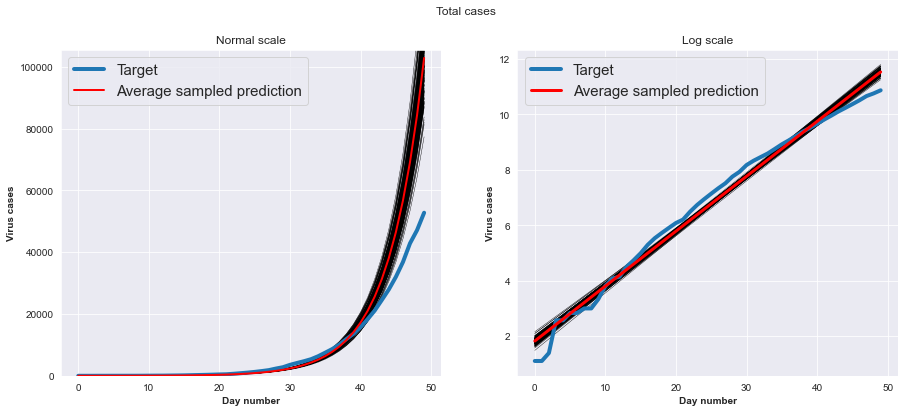

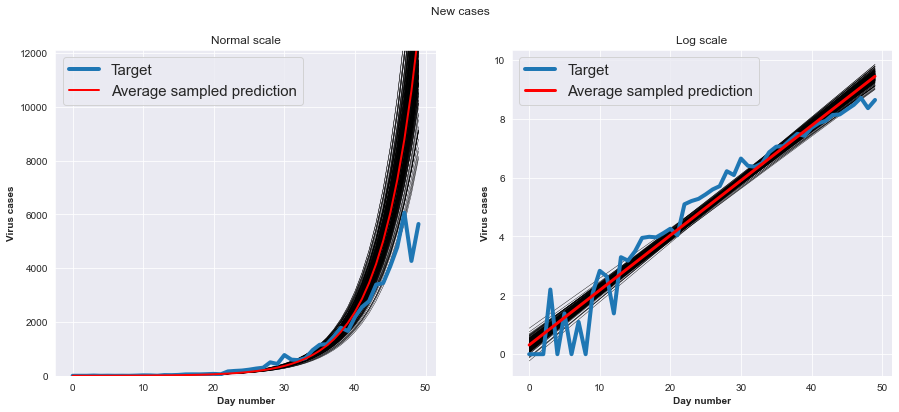

In [11]:
exponential_sampling(mu_total.flatten(), sigma_total, x_train, total_train, start=START_DATE, n=200, title='Total cases')
exponential_sampling(mu_new.flatten(), sigma_new, x_train, new_train, start=START_DATE, n=200, title='New cases')

Derive results for key dates: 1 May, 1 June, 1 September

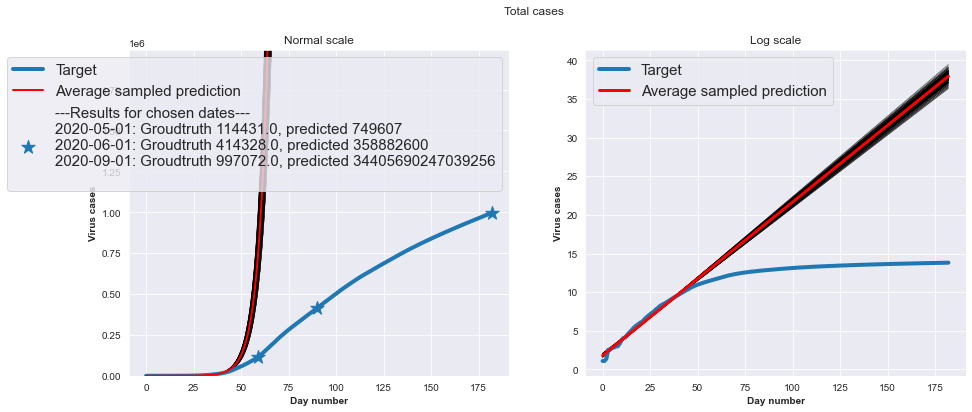

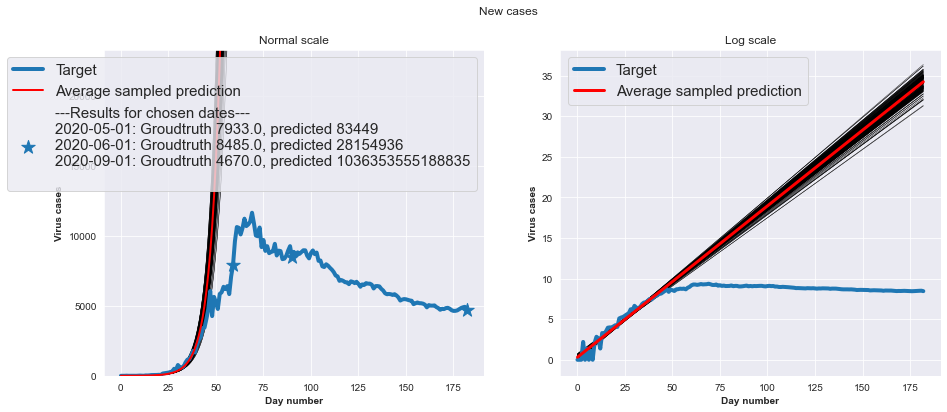

In [12]:
exponential_sampling(mu_total.flatten(), sigma_total, np.arange(len(total_cases)).reshape(-1, 1), total_cases, start=START_DATE,
                     n=200, title='Total cases', points=[OFFSETS, total_cases[OFFSETS]]);
exponential_sampling(mu_new.flatten(), sigma_new, np.arange(len(new_cases)).reshape(-1, 1), new_cases, start=START_DATE, 
                     n=200, title='New cases', points=[OFFSETS, new_cases[OFFSETS]]);

**Conclusion:** exponential model ia rather pessimistic, luckily number of virus cases stops growing so quickly (and also has finite upper bound)

### Sigmoidal model
<br>
Now let us use another function to predict virus cases:
$$\Phi(x) = \dfrac{1}{\sqrt{2 \pi}} \int_{-\infty}^{x} e^{-t^2 / 2} dt.$$

This function is cumulative distribution function of gaussian distribution. Its advantages for virus prediction are:
- fast growth
- bounded on segment [0, 1] -> sigmoidal saturation

However, we should deal somehow with its upper bound: in real life the number of infections may change from zero to some number $\alpha$ - max possible number of infections. Hence it is reasonable to predict target variable $y$ as
$$y = \alpha \ \Phi(\dfrac{x - \mu}{\sigma}), $$ 
where $\ \mu, \sigma, \alpha \ -$ parameters of the model.

It is simple to show the equivalence of the upper model and
$$y = \int_{-\infty}^{x} e^{w_0 + w_1 t + w_2 t^2} dt,$$
one could easily express $\ w_0, w_1, w_2$ using parameters $\ \mu, \sigma, \alpha.$

Taking derivative and logarithm of both sides leads us to
$$\log(\dfrac{dy}{dx}) = w_0 + w_1 x + w_2 x^2,$$
thus we come to a **linear regression model**.

---
<br>

Assuming that $(\dfrac{dy}{dx})_i = \dfrac{y_{i+1} - y_i}{x_{i+1} - x_i}$ and recalling $x_i = i$ (number of day), we would further use $(\dfrac{dy}{dx})_i = y_{i+1} - y_i.$

Finally we have

- diff(total cases) = new cases = $w_0 + w_1 x + w_2 x^2$
- total cases = cumulative_sum(new cases)

In [13]:
TRAIN_SIZE_SIGMOID = TRAIN_SIZE

diff_train = np.diff(data['total_cases'][:TRAIN_SIZE_SIGMOID + 1].values)
diff_train[diff_train == 0] = 1

# d(total_cases) / d(time) = new_cases !
assert np.all(np.equal(diff_train, data['new_cases'].replace(0, 1)[:TRAIN_SIZE_SIGMOID + 1].values[1:]))

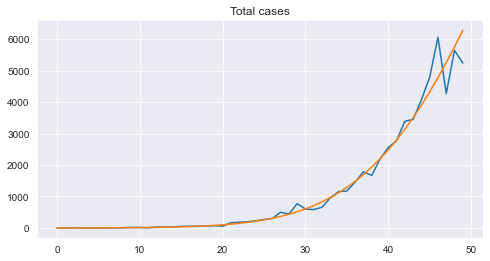

In [14]:
x_train_sigmoid = np.c_[np.arange(TRAIN_SIZE_SIGMOID), np.arange(TRAIN_SIZE_SIGMOID)**2]

sigmoid_model = LinearRegression()
sigmoid_model.fit(x_train_sigmoid, np.log(diff_train))

plt.figure(figsize=(8, 4))
plt.plot(diff_train)
plt.plot(np.exp(sigmoid_model.predict(x_train_sigmoid)))
plt.title("Total cases");

In [15]:
sigma_noise_sigmoid = np.std(np.log(diff_train) - sigmoid_model.predict(x_train_sigmoid))
print(f'Standard deviation: {sigma_noise_sigmoid}')

Standard deviation: 0.4861146977873167


In [16]:
# take some prior mu and sigma
mu_0 = np.random.randn(3)
sigma_0 = 100. * np.identity(3)

mu_sigmoid, sigma_sigmoid = bayesian_update(mu_0, sigma_0, x_train_sigmoid, np.log(diff_train), sigma_noise_sigmoid)

In [18]:
def sigmoidal_sampling(mu, sigma, n_days, n=20, total_cases=total_cases, new_cases=new_cases):
    # sample + draw data
    x = np.arange(n_days)
    my_w = np.random.multivariate_normal(mu, sigma, n)
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    res_total = []
    res_new = []
    for w in my_w:
        pred = np.exp(w[0] + w[1] * x + w[2] * x**2)
        total = np.cumsum(pred)
        ax[0].plot(x, total, 'k-', lw=.4)
        res_total.append(total)
        ax[1].plot(x, pred, 'k-', lw=.4)
        res_new.append(pred)
        
    ax[0].set_title('Total cases')
    ax[0].plot(x, total_cases[:n_days], linewidth=5, label="Target")
    ax[0].plot(x, np.mean(res_total, axis=0), linewidth=2, label="Average sampled prediction", color="red")
    ax[0].set_ylim((0, min(2 * max(total_cases[:n_days]), 2 * max(np.mean(res_total, axis=0)))))
    ax[0].set_xlabel('Day number', weight='bold')
    ax[0].set_ylabel('Virus cases', weight='bold')
    ax[0].legend(fontsize=15)
    ax[1].set_title('New cases')
    ax[1].plot(x, new_cases[:n_days], linewidth=5, label="Target")
    ax[1].plot(x, np.mean(res_new, axis=0), linewidth=3, label="Average sampled prediction", color="red")
    ax[1].set_ylim((0, min(2 * max(new_cases[:n_days]), 2 * max(np.mean(res_new, axis=0)))))
    ax[1].set_xlabel('Day number', weight='bold')
    ax[1].set_ylabel('Virus cases', weight='bold')
    ax[1].legend(fontsize=15)

    
def sigmoidal_sampling_with_dates(mu, sigma, n_days, start, n, points, total_cases=total_cases, new_cases=new_cases):
    # sample + draw data
    x = np.arange(n_days)
    my_w = np.random.multivariate_normal(mu, sigma, n)
    res_total = []
    res_new = []
    plt.figure(figsize=(14, 8))
    for w in my_w:
        pred = np.exp(w[0] + w[1] * x + w[2] * x**2)
        total = np.cumsum(pred)
        plt.plot(x, total, 'k-', lw=.4)
        res_total.append(total)
        res_new.append(pred)
    
    # total cases
    medians = np.median(res_total, axis=0)
    pred_10_proc = np.percentile(res_total, q=10, axis=0)
    pred_90_proc = np.percentile(res_total, q=90, axis=0)
    text = '---Total cases for chosen dates---\n\n'
    dates = [(pd.to_datetime(start) + pd.DateOffset(days=p)).date() for p in points]
    for date, true, med, p10, p90 in zip(dates, total_cases[points], medians[points], pred_10_proc[points], pred_90_proc[points]):
        text += f'{date}:\nGroundtruth: {true}\nMedian prediction: {int(med)}\nPredicted for bad case (90-percentile): {int(p90)}\n' + \
                f'Predicted for good case (10-percentile): {int(p10)}\n\n'
    plt.title(text)
    plt.scatter(points, total_cases[points], marker='*', s=200)
    plt.plot(x, total_cases[:n_days], linewidth=6, label="Target")
    plt.plot(x, medians, linewidth=4, label="Median of sampled predictions", color="red")
    plt.plot(x, pred_10_proc, linewidth=4, label="10th percentile of sampled predictions")
    plt.plot(x, pred_90_proc, linewidth=4, label="90th percentile of sampled predictions")
    plt.ylim((0, min(2 * max(total_cases[:n_days]), 1.1 * max(pred_90_proc))))
    plt.xlabel('Day number', weight='bold')
    plt.ylabel('Virus cases', weight='bold')
    plt.legend(fontsize=15)
    plt.show()
    
    # new cases
    plt.figure(figsize=(14, 8))
    for r in res_new:
        plt.plot(x, r, 'k-', lw=.4)
    medians = np.median(res_new, axis=0)
    pred_10_proc = np.percentile(res_new, q=10, axis=0)
    pred_90_proc = np.percentile(res_new, q=90, axis=0)
    text = '---New cases for chosen dates---\n\n'
    for date, true, med, p10, p90 in zip(DATES, new_cases[points], medians[points], pred_10_proc[points], pred_90_proc[points]):
        text += f'{date}:\nGroundtruth: {true}\nMedian prediction: {int(med)}\nPredicted for bad case (90-percentile): {int(p90)}\n' + \
                f'Predicted for good case (10-percentile): {int(p10)}\n\n'
    plt.title(text)
    plt.scatter(points, new_cases[points], marker='*', s=200)
    plt.plot(x, new_cases[:n_days], linewidth=6, label="Target")
    plt.plot(x, medians, linewidth=4, label="Median of sampled predictions", color="red")
    plt.plot(x, pred_10_proc, linewidth=4, label="10th percentile of sampled predictions")
    plt.plot(x, pred_90_proc, linewidth=4, label="90th percentile of sampled predictions")
    plt.ylim((0, min(2 * max(new_cases[:n_days]), 1.1 * max(pred_90_proc))))
    plt.xlabel('Day number', weight='bold')
    plt.ylabel('Virus cases', weight='bold')
    plt.legend(fontsize=15)

Now let us observe results using sigmoid model

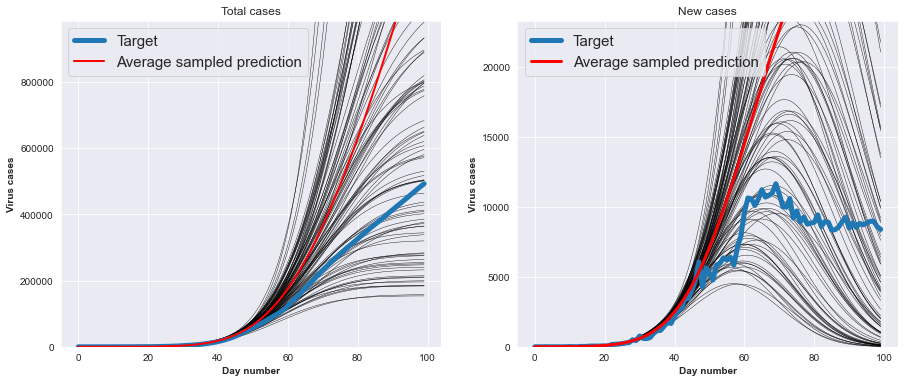

In [19]:
sigmoidal_sampling(mu_sigmoid.flatten(), sigma_sigmoid, n_days=100, n=100)

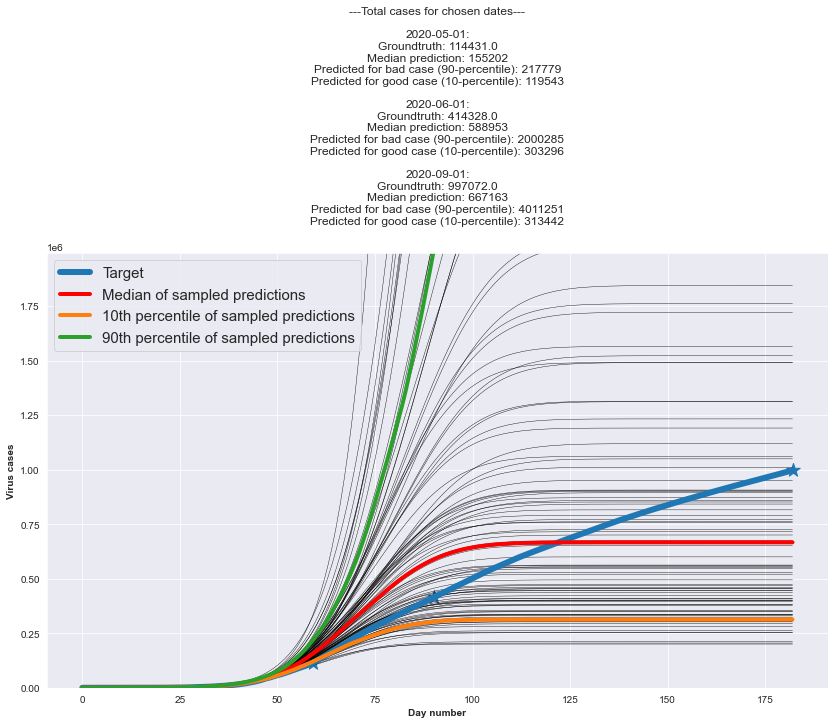

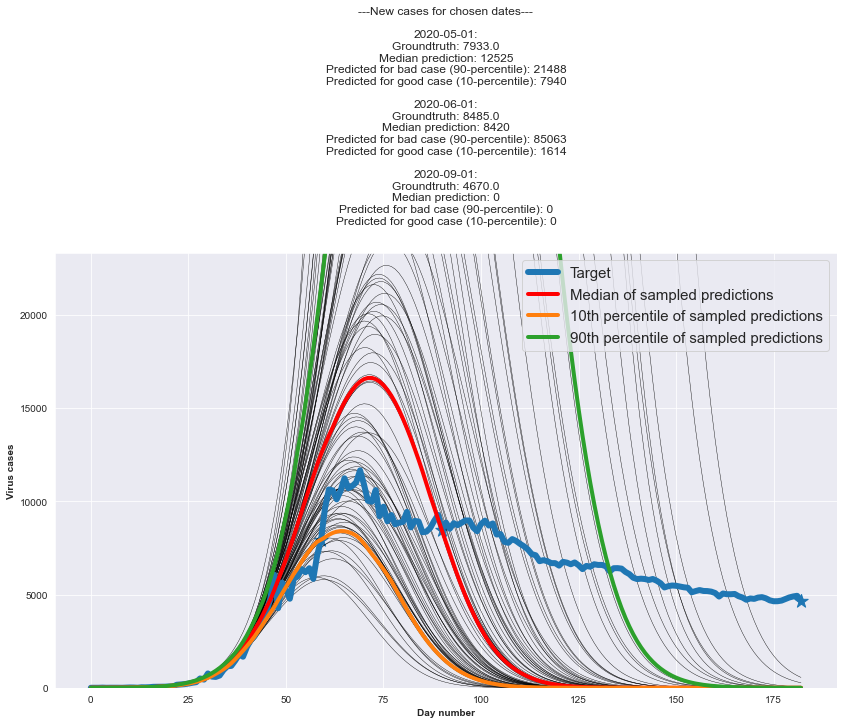

In [21]:
sigmoidal_sampling_with_dates(mu_sigmoid.flatten(), sigma_sigmoid, n_days=183, start=START_DATE, n=100, points=OFFSETS)

### Other countries

Consider situation in Netherlands

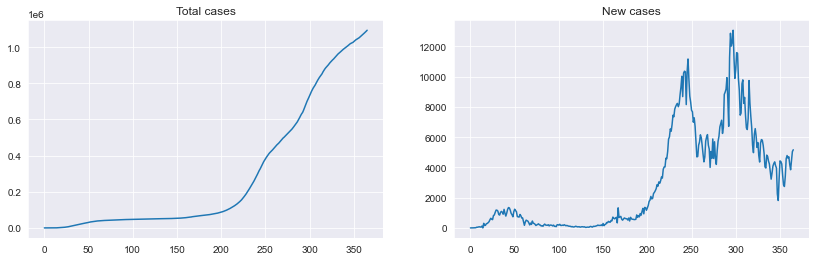

In [22]:
data_other = data_full.loc[data_full['location'] == 'Netherlands']
data_other = data_other[:].reset_index()

# plot the data
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(data_other['total_cases'].values)
ax[0].set_title("Total cases")
ax[1].plot(data_other['new_cases'].values)
ax[1].set_title("New cases");

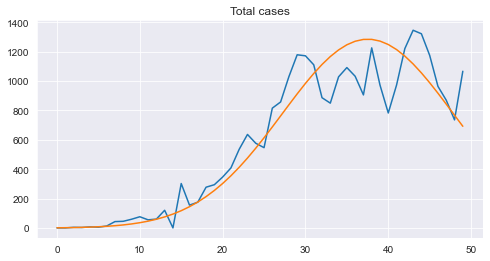

In [23]:
TRAIN_SIZE_OTHER = 50

x_other = np.c_[np.arange(TRAIN_SIZE_OTHER), np.arange(TRAIN_SIZE_OTHER)**2]
new_other = data_other['new_cases'].values
new_other[new_other == 0] = 1
other_train = new_other[:TRAIN_SIZE_OTHER]
model_other = LinearRegression()
model_other.fit(x_other, np.log(other_train))

plt.figure(figsize=(8, 4))
plt.plot(other_train)
plt.plot(np.exp(model_other.predict(x_other)))
plt.title("Total cases");

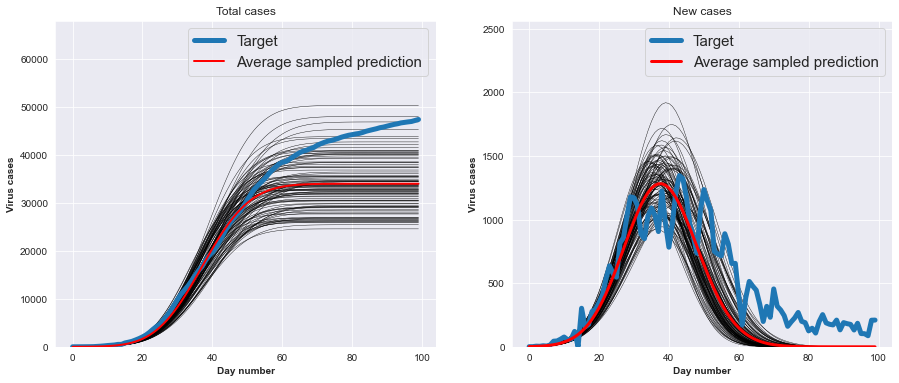

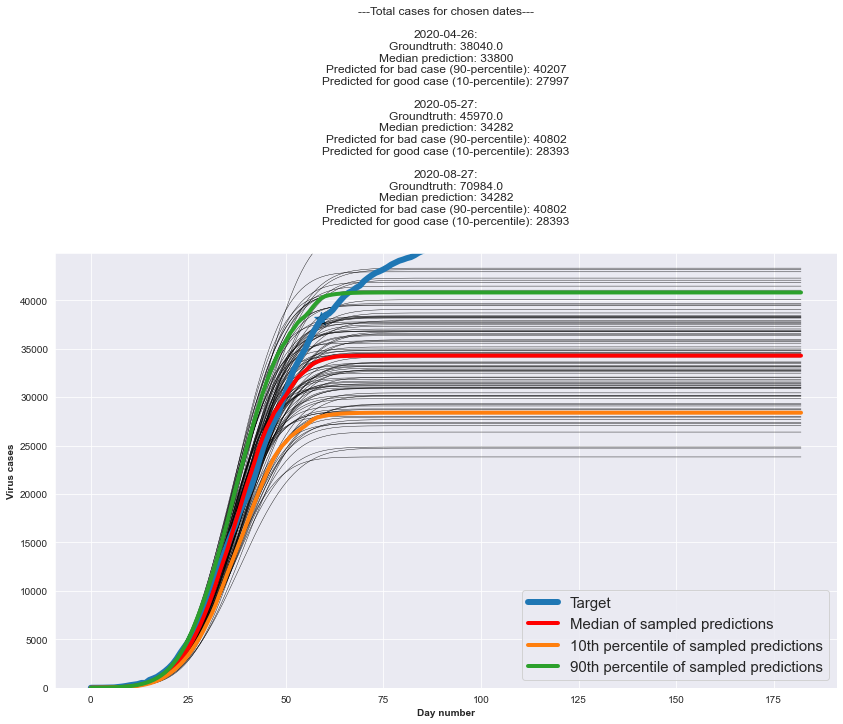

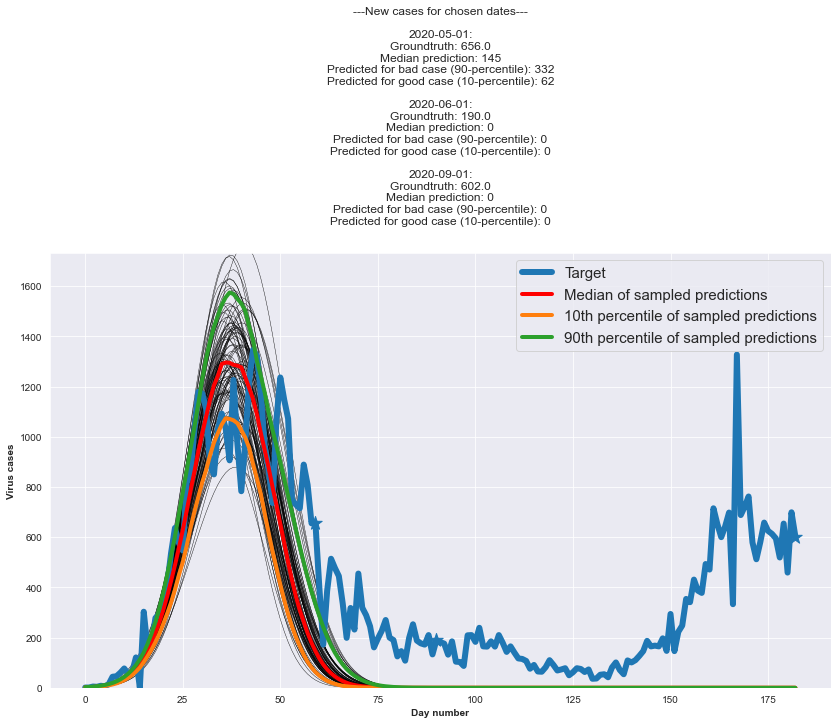

In [25]:
sigma_other = np.std(np.log(other_train) - model_other.predict(x_other))
mu_other, sigma_other = bayesian_update(mu_0, sigma_0, x_other, np.log(other_train), sigma_other)

sigmoidal_sampling(mu_other.flatten(), sigma_other, n_days=100, n=100, total_cases=data_other['total_cases'].values, new_cases=data_other['new_cases'].values)
sigmoidal_sampling_with_dates(mu_other.flatten(), sigma_other, n_days=183, start=data_other['date'][0].date(), n=100, points=OFFSETS, 
                              total_cases=data_other['total_cases'].values, new_cases=data_other['new_cases'].values)

Compare posterior parameters $\mu$ and $\Sigma$ for different countries:

In [26]:
print(f'mu [Russia]:\n{mu_sigmoid.flatten()}\nsigma [Russia]:\n{sigma_sigmoid}\n')
print(f'mu [Netherlands]:\n{mu_other.flatten()}\nsigma [Netherlands]:\n{sigma_other}\n')

mu [Russia]:
[-0.20672749  0.28004303 -0.00198673]
sigma [Russia]:
[[ 3.92906260e-02 -3.17445729e-03  5.34420169e-05]
 [-3.17445729e-03  3.50054875e-04 -6.68118382e-06]
 [ 5.34420169e-05 -6.68118382e-06  1.36356785e-07]]

mu [Netherlands]:
[ 0.53732795  0.35286132 -0.00470108]
sigma [Netherlands]:
[[ 9.17385417e-02 -7.41193887e-03  1.24779979e-04]
 [-7.41193887e-03  8.17446640e-04 -1.56025794e-05]
 [ 1.24779979e-04 -1.56025794e-05  3.18453234e-07]]



**Note:** The posterior parameters seem to be similar to each other, but it is hard to make full analysis due to different speed of virus spreading, this leads sometimes to cases when sigmoid model fails to predict correctly even 10 days after training 50 days.

### Final conclusion
<br>

- It seems a good choice to model coronavirus or any other processes with fast growth and saturation stage using sigmoid functions. Of course, the processes in real life are very complex, so one should not heavily rely on modeling results, still, using such predictions for lower and upper bounds on earlier stages seems reasonable.
- Speaking on coronavirus, our hopes on quick ending of pandemia were sadly ruined :( However, I could propose that we are able to model not the whole process, but "waves" of virus spreading, and finally the resulting model can be represented as sum of normal distributions (or any other with cumulative distribution ~ sigmoid)

<br>

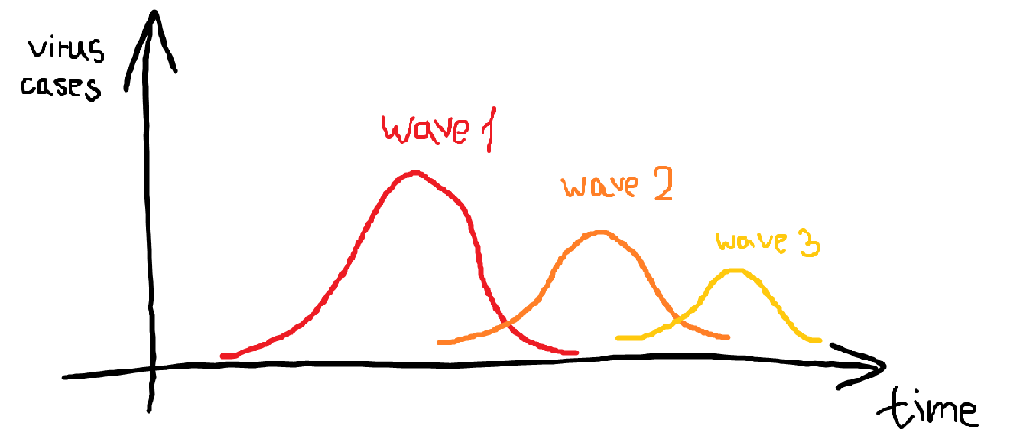